In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [11]:
df= pd.read_csv('regr1.txt',sep=' ',header=None,names=['f','t'])

In [12]:
df

,f,t
0,0.10,0.69004
1,0.11,0.69497
2,0.12,0.74252
3,0.13,0.75360
4,0.14,0.83568
...,...,...
85,0.95,1.98410
86,0.96,2.00660
87,0.97,2.04930
88,0.98,2.05030


In [13]:
f= df['f'].values
t= df['t'].values

In [14]:
f

array([0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ,
       0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31,
       0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42,
       0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53,
       0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64,
       0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75,
       0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86,
       0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97,
       0.98, 0.99])

In [15]:
t

array([0.69004, 0.69497, 0.74252, 0.7536 , 0.83568, 0.86789, 0.84182,
       0.85379, 0.85762, 0.8839 , 0.89985, 0.98436, 1.0244 , 1.0572 ,
       0.99077, 1.0058 , 1.0727 , 1.0943 , 1.1432 , 1.1045 , 1.1867 ,
       1.1385 , 1.2245 , 1.2406 , 1.2071 , 1.2658 , 1.2995 , 1.3142 ,
       1.2663 , 1.2578 , 1.2991 , 1.3058 , 1.3478 , 1.3506 , 1.4044 ,
       1.3948 , 1.38   , 1.448  , 1.4168 , 1.4719 , 1.4656 , 1.4399 ,
       1.5174 , 1.4988 , 1.4751 , 1.5326 , 1.5297 , 1.5372 , 1.6094 ,
       1.6352 , 1.5843 , 1.6643 , 1.5987 , 1.6585 , 1.6317 , 1.7074 ,
       1.6654 , 1.6551 , 1.6964 , 1.7143 , 1.7706 , 1.7622 , 1.726  ,
       1.8089 , 1.7905 , 1.7428 , 1.8381 , 1.8182 , 1.7865 , 1.7995 ,
       1.8296 , 1.8625 , 1.8623 , 1.8383 , 1.8593 , 1.8944 , 1.9598 ,
       1.9    , 1.9244 , 1.9397 , 1.944  , 1.9718 , 1.9383 , 1.9555 ,
       2.0006 , 1.9841 , 2.0066 , 2.0493 , 2.0503 , 2.0214 ])

In [16]:
m,c=0,0
lr=0.01

In [17]:
def train_values(x,y,m,c,eta):
    y_pred= m*x+c
    const= -2/len(y)
    delt_c= const*sum(y-y_pred)
    delt_m= const*sum(x*(y-y_pred))
    m= m-eta*delt_m
    c= c-eta*delt_c
    error= sum((y-y_pred)**2)/len(y)
    return m,c,error
def train_all_values(x,y,m,c,eta,iterations=100):
    for i in range(iterations):
        m,c,err= train_values(x,y,m,c,eta)
    return m,c,err

m=0.688279 c=1.01956 error=0.0498909
m=0.800514 c=1.05392 error=0.0317426
m=0.866239 c=1.02307 error=0.0264368
m=0.923057 c=0.990904 error=0.0221637
m=0.974149 c=0.961584 error=0.0186852
m=1.02024 c=0.935108 error=0.0158534
m=1.06182 c=0.911219 error=0.0135482
m=1.09933 c=0.889664 error=0.0116715
m=1.13318 c=0.870216 error=0.0101438
m=1.16373 c=0.852669 error=0.00890005


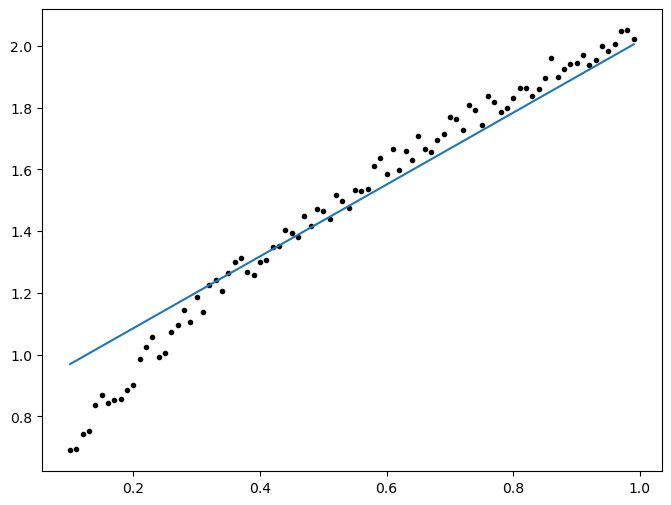

In [18]:
fig= plt.figure(figsize=(8,6))
ax= fig.add_subplot(1,1,1)
for j in range(10):
    m,c,error= train_all_values(f,t,m,c,lr,iterations=100)
    print('m={0:.6} c={1:.6} error={2:.6}'.format(m,c,error))
    y= f*m+c
    ax.clear()
    ax.plot(f,t,'.k')
    ax.plot(f,y)
    time.sleep(1)

Text(0.5, 1.0, 'Gradient_Descent')

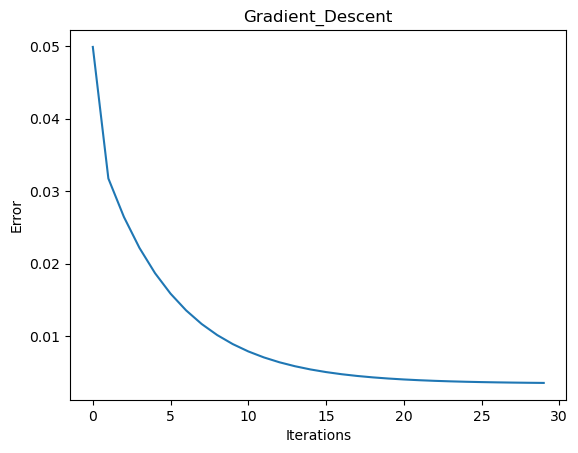

In [40]:
m,c=0,0
lr=0.01
ms,cs,err=[],[],[]
for j in range(30):
    m,c,error= train_all_values(f,t,m,c,lr,iterations=100)
    ms.append(m)
    cs.append(c)
    err.append(error)
epochs= range(30)
plt.plot(epochs,err)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Gradient_Descent')

In [38]:
err

[0.04989089755190449,
 0.031742643656485305,
 0.02643681793836803,
 0.022163658141046583,
 0.018685193435613492,
 0.015853449058269825,
 0.013548185100093946,
 0.011671517851565342,
 0.01014376223414113,
 0.008900048289433367,
 0.007887566738968751,
 0.0070633266519349105,
 0.006392330009317763,
 0.005846085654685895,
 0.005401399532556657,
 0.005039389846712636,
 0.004744685321153361,
 0.004504772521078341,
 0.004309464520528978,
 0.00415046835581136,
 0.0040210328983605655,
 0.003915662195392632,
 0.003829882106515693,
 0.003760050327468206,
 0.003703201734411449,
 0.0036569224819476835,
 0.0036192475089458706,
 0.00358857710017471,
 0.0035636089608705314,
 0.0035432829200614893]

## Stochastic Gradient Descent

In [44]:
np.random.randint(0,30,10)

array([18, 21,  7,  2, 10, 18, 19, 20,  5,  1])

m=1.42373 c=0.706027 error=0.00285547
m=1.42929 c=0.697279 error=0.00388446
m=1.43821 c=0.702483 error=0.00325966
m=1.45144 c=0.694407 error=0.00397417
m=1.44024 c=0.682658 error=0.00337105
m=1.44834 c=0.706007 error=0.00280696
m=1.44969 c=0.696692 error=0.00423823
m=1.45255 c=0.682182 error=0.00340653
m=1.46226 c=0.688281 error=0.00395036
m=1.45575 c=0.683007 error=0.00162551


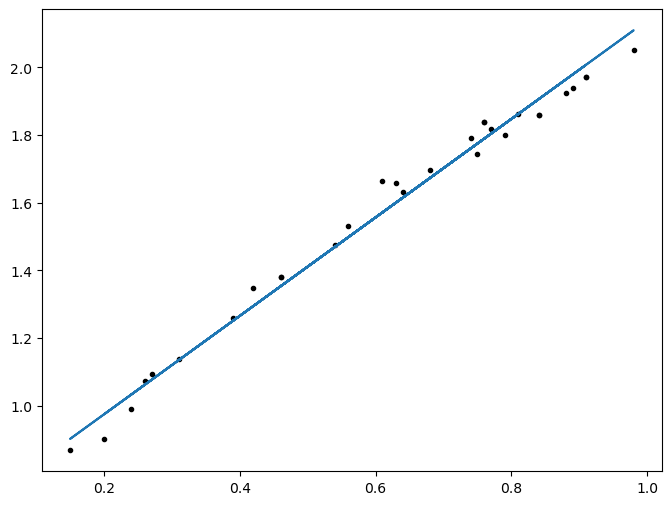

In [54]:
fig= plt.figure(figsize=(8,6))
ax= fig.add_subplot(1,1,1)
for j in range(10):
    length= np.random.randint(0,len(f),30)
    fs= np.take(f,length)
    ts= np.take(t,length)
    m,c,error= train_all_values(fs,ts,m,c,lr,iterations=100)
    print('m={0:.6} c={1:.6} error={2:.6}'.format(m,c,error))
    y= fs*m+c
    ax.clear()
    ax.plot(fs,ts,'.k')
    ax.plot(fs,y)
    time.sleep(1)

In [46]:
length= np.random.randint(0,len(f),10)
length

array([35,  3, 54, 24, 88, 10,  4, 49, 74, 37])

In [49]:
fs= np.take(f,length)
fs

array([0.25, 0.99, 0.72, 0.74, 0.98, 0.69, 0.11, 0.78, 0.39, 0.85])

Text(0.5, 1.0, 'Stochastic_Gradient_Descent')

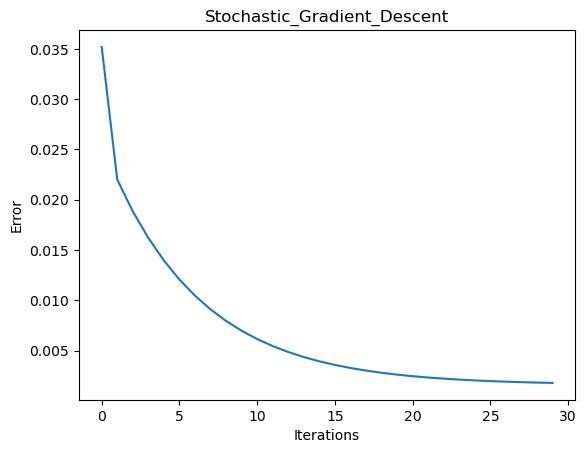

In [55]:
m,c=0,0
lr=0.01
ms,cs,err=[],[],[]
for j in range(30):
    m,c,error= train_all_values(fs,ts,m,c,lr,iterations=100)
    ms.append(m)
    cs.append(c)
    err.append(error)
epochs= range(30)
plt.plot(epochs,err)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Stochastic_Gradient_Descent')